<a href="https://colab.research.google.com/github/richard523/Coding-Challenge-S22/blob/main/mushroom_predict_version_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

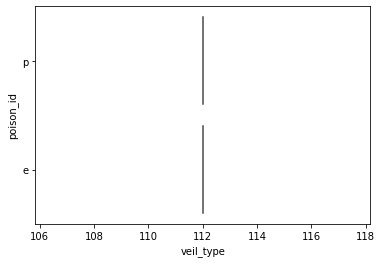

{112.0}


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data = pd.read_csv('./sample_data/mushrooms.csv')
#1 
#data.poison_id = [ float(ord(x)) - 111 if float(ord(x)) >= 112 else 
#                  float(ord(x)) - 101 for x in data.poison_id ]


#2 {98.0, 99.0, 102.0, 107.0, 115.0, 120.0} maps to  ? b f s x but normalized to 0 1 2 3 4 5
data.cap_shape	 = [ float(ord(x)) for x in data.cap_shape ]
data.cap_shape = [ x - 98 if x == 98 else x for x in data.cap_shape ]    
data.cap_shape = [ x - 98 if x == 99 else x for x in data.cap_shape ]
data.cap_shape = [ x - 100 if x == 102 else x for x in data.cap_shape ] 
data.cap_shape = [ x - 104 if x == 107 else x for x in data.cap_shape ] 
data.cap_shape = [ x - 111 if x == 115 else x for x in data.cap_shape ] 
data.cap_shape = [ x - 115 if x == 120 else x for x in data.cap_shape ] 


#3 {121.0, 115.0, 102.0, 103.0} maps to ? f g s y normalized to 0 1 2 3
data.cap_surface	 = [ float(ord(x)) for x in data.cap_surface ]
data.cap_surface = [ x - 102 if x == 102 else x for x in data.cap_surface ]  
data.cap_surface = [ x - 102 if x == 103 else x for x in data.cap_surface ]  
data.cap_surface = [ x - 113 if x == 115 else x for x in data.cap_surface ]  
data.cap_surface = [ x - 118 if x == 121 else x for x in data.cap_surface ]  

#4 {98.0, 99.0, 101.0, 103.0, 110.0, 112.0, 114.0, 117.0, 119.0, 121.0} to --> 0 to 9
data.cap_color = [ float(ord(x)) for x in data.cap_color ]
data.cap_color = [ x - 98 if x == 98 else x for x in data.cap_color ] 
data.cap_color = [ x - 98 if x == 99 else x for x in data.cap_color ]  
data.cap_color = [ x - 99 if x == 101 else x for x in data.cap_color ]  
data.cap_color = [ x - 100 if x == 103 else x for x in data.cap_color ]  
data.cap_color = [ x - 106 if x == 110 else x for x in data.cap_color ]  
data.cap_color = [ x - 107 if x == 112 else x for x in data.cap_color ]  
data.cap_color = [ x - 108 if x == 114 else x for x in data.cap_color ]  
data.cap_color = [ x - 110 if x == 117 else x for x in data.cap_color ]  
data.cap_color = [ x - 111 if x == 119 else x for x in data.cap_color ]  
data.cap_color = [ x - 113 if x == 121 else x for x in data.cap_color ]   

#5 true or false --> 1 or 0
data.bruises = [ float(ord(x)) for x in data.bruises ]
data.bruises = [ x - 102 if x == 102 else x for x in data.bruises ] 
data.bruises = [ x - 115 if x == 116 else x for x in data.bruises ] 

#6 {97.0, 99.0, 102.0, 108.0, 109.0, 110.0, 112.0, 115.0, 121.0} --> 0 to 8
data.odor = [ float(ord(x)) for x in data.odor ]
data.odor = [ x - 97 if x == 97 else x for x in data.odor ] 
data.odor = [ x - 98 if x == 99 else x for x in data.odor ]
data.odor = [ x - 100 if x == 102 else x for x in data.odor ]
data.odor = [ x - 105 if x == 108 else x for x in data.odor ]
data.odor = [ x - 105 if x == 109 else x for x in data.odor ]
data.odor = [ x - 105 if x == 110 else x for x in data.odor ]
data.odor = [ x - 106 if x == 112 else x for x in data.odor ]
data.odor = [ x - 108 if x == 115 else x for x in data.odor ]
data.odor = [ x - 113 if x == 121 else x for x in data.odor ]

#7 {97.0, 102.0} --> t or f --> 0 or 1 (f is 1)
data.gill_attachment = [ float(ord(x)) for x in data.gill_attachment ]
data.gill_attachment = [ x - 97 if x == 97 else x for x in data.gill_attachment ]
data.gill_attachment = [ x - 101 if x == 102 else x for x in data.gill_attachment ]

#8 {99.0, 119.0} --> 0 or 1
data.gill_spacing = [ float(ord(x)) for x in data.gill_spacing ]
data.gill_spacing = [ x - 99 if x == 99 else x for x in data.gill_spacing ]
data.gill_spacing = [ x - 118 if x == 119 else x for x in data.gill_spacing ]

#9 {98, 110} --> 0 or 1
data.gill_size = [ float(ord(x)) for x in data.gill_size ]
data.gill_size = [ x - 98 if x == 98 else x for x in data.gill_size ]
data.gill_size = [ x - 109 if x == 110 else x for x in data.gill_size ]

#10 {98.0, 101.0, 103.0, 104.0, 107.0, 110.0, 111.0, 112.0, 114.0, 117.0, 119.0, 121.0} --> 0 to 11
data.gill_color = [ float(ord(x)) for x in data.gill_color ]
data.gill_color = [ x - 98 if x == 98 else x for x in data.gill_color ]
data.gill_color = [ x - 100 if x == 101 else x for x in data.gill_color ]
data.gill_color = [ x - 101 if x == 103 else x for x in data.gill_color ]
data.gill_color = [ x - 101 if x == 104 else x for x in data.gill_color ]
data.gill_color = [ x - 103 if x == 107 else x for x in data.gill_color ]
data.gill_color = [ x - 105 if x == 110 else x for x in data.gill_color ]
data.gill_color = [ x - 105 if x == 111 else x for x in data.gill_color ]
data.gill_color = [ x - 105 if x == 112 else x for x in data.gill_color ]
data.gill_color = [ x - 106 if x == 114 else x for x in data.gill_color ]
data.gill_color = [ x - 108 if x == 117 else x for x in data.gill_color ]
data.gill_color = [ x - 109 if x == 119 else x for x in data.gill_color ]
data.gill_color = [ x - 110 if x == 121 else x for x in data.gill_color ]

#11 {116.0, 101.0} --> 0 or 1
data.stalk_shape = [ float(ord(x)) for x in data.stalk_shape ]
data.stalk_shape = [ x - 101 if x == 101 else x for x in data.stalk_shape ]
data.stalk_shape = [ x - 115 if x == 116 else x for x in data.stalk_shape ]

#12 {98.0, 99.0, 101.0, 114.0, 63.0} --> 0 to 4
data.stalk_root	 = [ float(ord(x)) for x in data.stalk_root ]
data.stalk_root = [ x - 63 if x == 63 else x for x in data.stalk_root ]
data.stalk_root = [ x - 97 if x == 98 else x for x in data.stalk_root ]
data.stalk_root = [ x - 97 if x == 99 else x for x in data.stalk_root ]
data.stalk_root = [ x - 98 if x == 101 else x for x in data.stalk_root ]
data.stalk_root = [ x - 110 if x == 114 else x for x in data.stalk_root ]

#13 {107.0, 121.0, 115.0, 102.0} --> 0 to 3
data.stalk_surface_above_ring = [ float(ord(x)) for x in data.stalk_surface_above_ring ]
data.stalk_surface_above_ring = [ x - 102 if x == 102 else x for x in data.stalk_surface_above_ring ]
data.stalk_surface_above_ring = [ x - 106 if x == 107 else x for x in data.stalk_surface_above_ring ]
data.stalk_surface_above_ring = [ x - 113 if x == 115 else x for x in data.stalk_surface_above_ring ]
data.stalk_surface_above_ring = [ x - 118 if x == 121 else x for x in data.stalk_surface_above_ring ]

#14 {107.0, 121.0, 115.0, 102.0} --> 0 to 3
data.stalk_surface_below_ring = [ float(ord(x)) for x in data.stalk_surface_below_ring ]
data.stalk_surface_below_ring = [ x - 102 if x == 102 else x for x in data.stalk_surface_below_ring ]
data.stalk_surface_below_ring = [ x - 106 if x == 107 else x for x in data.stalk_surface_below_ring ]
data.stalk_surface_below_ring = [ x - 113 if x == 115 else x for x in data.stalk_surface_below_ring ]
data.stalk_surface_below_ring = [ x - 118 if x == 121 else x for x in data.stalk_surface_below_ring ]

#15 {98.0, 99.0, 101.0, 103.0, 110.0, 111.0, 112.0, 119.0, 121.0} --> 0 to 8
data.stalk_color_above_ring = [ float(ord(x)) for x in data.stalk_color_above_ring ]
data.stalk_color_above_ring = [ x - 98 if x == 98 else x for x in data.stalk_color_above_ring ]
data.stalk_color_above_ring = [ x - 98 if x == 99 else x for x in data.stalk_color_above_ring ]
data.stalk_color_above_ring = [ x - 99 if x == 101 else x for x in data.stalk_color_above_ring ]
data.stalk_color_above_ring = [ x - 100 if x == 103 else x for x in data.stalk_color_above_ring ]
data.stalk_color_above_ring = [ x - 106 if x == 110 else x for x in data.stalk_color_above_ring ]
data.stalk_color_above_ring = [ x - 106 if x == 111 else x for x in data.stalk_color_above_ring ]
data.stalk_color_above_ring = [ x - 105 if x == 112 else x for x in data.stalk_color_above_ring ]
data.stalk_color_above_ring = [ x - 111 if x == 119 else x for x in data.stalk_color_above_ring ]
data.stalk_color_above_ring = [ x - 112 if x == 121 else x for x in data.stalk_color_above_ring ]


#16 {98.0, 99.0, 101.0, 103.0, 110.0, 111.0, 112.0, 119.0, 121.0} --> 0 to 8
data.stalk_color_below_ring = [ float(ord(x)) for x in data.stalk_color_below_ring ]
data.stalk_color_below_ring = [ x - 98 if x == 98 else x for x in data.stalk_color_below_ring ]
data.stalk_color_below_ring = [ x - 98 if x == 99 else x for x in data.stalk_color_below_ring ]
data.stalk_color_below_ring = [ x - 99 if x == 101 else x for x in data.stalk_color_below_ring ]
data.stalk_color_below_ring = [ x - 100 if x == 103 else x for x in data.stalk_color_below_ring ]
data.stalk_color_below_ring = [ x - 106 if x == 110 else x for x in data.stalk_color_below_ring ]
data.stalk_color_below_ring = [ x - 106 if x == 111 else x for x in data.stalk_color_below_ring ]
data.stalk_color_below_ring = [ x - 105 if x == 112 else x for x in data.stalk_color_below_ring ]
data.stalk_color_below_ring = [ x - 111 if x == 119 else x for x in data.stalk_color_below_ring ]
data.stalk_color_below_ring = [ x - 112 if x == 121 else x for x in data.stalk_color_below_ring ]

#17 do we want to delete this useless piece of data?
data.veil_type = [ float(ord(x)) for x in data.veil_type ]
# data.stalk_color_below_ring = [ x - 112 if x == 121 else x for x in data.stalk_color_below_ring ]

#18  {121.0, 111.0, 110.0, 119.0} --> 0 to 3
data.veil_color = [ float(ord(x)) for x in data.veil_color ]
data.veil_color = [ x - 110 if x == 110 else x for x in data.veil_color ]
data.veil_color = [ x - 110 if x == 111 else x for x in data.veil_color ]
data.veil_color = [ x - 117 if x == 119 else x for x in data.veil_color ]
data.veil_color = [ x - 118 if x == 121 else x for x in data.veil_color ]

#19 {116.0, 110.0, 111.0} order matters? none one two == 110 111 116 -->
data.ring_number = [ float(ord(x)) for x in data.ring_number ]
data.ring_number = [ x - 110 if x == 110 else x for x in data.ring_number ]
data.ring_number = [ x - 110 if x == 111 else x for x in data.ring_number ]
data.ring_number = [ x - 114 if x == 116 else x for x in data.ring_number ]

#20 {101.0, 102.0, 108.0, 110.0, 112.0} --> 0 to 4
data.ring_typ = [ float(ord(x)) for x in data.ring_typ ]
data.ring_typ = [ x - 101 if x == 101 else x for x in data.ring_typ ]
data.ring_typ = [ x - 101 if x == 102 else x for x in data.ring_typ ]
data.ring_typ = [ x - 106 if x == 108 else x for x in data.ring_typ ]
data.ring_typ = [ x - 107 if x == 110 else x for x in data.ring_typ ]
data.ring_typ = [ x - 108 if x == 112 else x for x in data.ring_typ ]

#21 {98.0, 104.0, 107.0, 110.0, 111.0, 114.0, 117.0, 119.0, 121.0} to 0 to 8 
data.spore_print_color = [ float(ord(x)) for x in data.spore_print_color ]
data.spore_print_color = [ x - 98 if x == 98 else x for x in data.spore_print_color ]
data.spore_print_color = [ x - 103 if x == 104 else x for x in data.spore_print_color ]
data.spore_print_color = [ x - 105 if x == 107 else x for x in data.spore_print_color ]
data.spore_print_color = [ x - 107 if x == 110 else x for x in data.spore_print_color ]
data.spore_print_color = [ x - 107 if x == 111 else x for x in data.spore_print_color ]
data.spore_print_color = [ x - 109 if x == 114 else x for x in data.spore_print_color ]
data.spore_print_color = [ x - 111 if x == 117 else x for x in data.spore_print_color ]
data.spore_print_color = [ x - 112 if x == 119 else x for x in data.spore_print_color ]
data.spore_print_color = [ x - 114 if x == 121 else x for x in data.spore_print_color ] # outlier?

#22  {97.0, 99.0, 110.0, 115.0, 118.0, 121.0} --> 0 to 5
data.population = [ float(ord(x)) for x in data.population ]
data.population = [ x - 97 if x == 97 else x for x in data.population ]
data.population = [ x - 98 if x == 99 else x for x in data.population ]
data.population = [ x - 108 if x == 110 else x for x in data.population ]
data.population = [ x - 112 if x == 115 else x for x in data.population ]
data.population = [ x - 114 if x == 118 else x for x in data.population ]
data.population = [ x - 116 if x == 121 else x for x in data.population ]


#23 {100.0, 103.0, 108.0, 109.0, 112.0, 117.0, 119.0} --> 0 to 6
data.habitat = [ float(ord(x)) for x in data.habitat]
data.habitat = [ x - 100 if x == 100 else x for x in data.habitat ]
data.habitat = [ x - 102 if x == 103 else x for x in data.habitat ]
data.habitat = [ x - 106 if x == 108 else x for x in data.habitat ]
data.habitat = [ x - 106 if x == 109 else x for x in data.habitat ]
data.habitat = [ x - 108 if x == 112 else x for x in data.habitat ]
data.habitat = [ x - 112 if x == 117 else x for x in data.habitat ]
data.habitat = [ x - 113 if x == 119 else x for x in data.habitat ]

#24
# mushroom id number
g = sns.violinplot(y='poison_id', x='veil_type', data=data, inner='quartile')
plt.show()
print(set(data.veil_type))



In [4]:
data.cap_shape

0       5.0
1       5.0
2       0.0
3       5.0
4       5.0
       ... 
8119    3.0
8120    5.0
8121    2.0
8122    3.0
8123    5.0
Name: cap_shape, Length: 8124, dtype: float64

In [5]:
data.head(1000)

,poison_id,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_typ,spore_print_color,population,habitat,mushroom_id
0,p,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,3.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,4.0,2.0,3.0,5.0,1
1,e,5.0,2.0,8.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,2.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,4.0,3.0,2.0,1.0,2
2,e,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,4.0,3.0,2.0,3.0,3
3,p,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,3.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,4.0,2.0,3.0,5.0,4
4,e,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,3.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,0.0,3.0,0.0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,e,2.0,2.0,8.0,0.0,5.0,1.0,1.0,0.0,5.0,1.0,3.0,0.0,0.0,8.0,8.0,112.0,2.0,1.0,0.0,2.0,0.0,1.0,996
996,e,5.0,3.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,4.0,3.0,3.0,3.0,997
997,e,2.0,2.0,8.0,1.0,0.0,1.0,1.0,1.0,10.0,1.0,1.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,4.0,6.0,4.0,0.0,998
998,e,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,10.0,0.0,2.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,4.0,3.0,2.0,3.0,999


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   poison_id                 8124 non-null   object 
 1   cap_shape                 8124 non-null   float64
 2   cap_surface               8124 non-null   float64
 3   cap_color                 8124 non-null   float64
 4   bruises                   8124 non-null   float64
 5   odor                      8124 non-null   float64
 6   gill_attachment           8124 non-null   float64
 7   gill_spacing              8124 non-null   float64
 8   gill_size                 8124 non-null   float64
 9   gill_color                8124 non-null   float64
 10  stalk_shape               8124 non-null   float64
 11  stalk_root                8124 non-null   float64
 12  stalk_surface_above_ring  8124 non-null   float64
 13  stalk_surface_below_ring  8124 non-null   float64
 14  stalk_co

In [7]:
data.describe()


,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_typ,spore_print_color,population,habitat,mushroom_id
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,3.348104,1.827671,4.372723,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,0.567208,1.109798,1.575086,1.603644,6.597243,6.567701,112.0,1.965534,1.069424,2.291974,3.590842,3.644018,1.508616,4062.500000
std,1.604329,1.229873,2.325781,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,0.495493,1.061106,0.621459,0.675974,2.275448,2.285155,0.0,0.242669,0.271064,1.801672,2.372956,1.252082,1.719975,2345.341127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,112.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,1.000000,7.000000,7.000000,112.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000,2031.750000
50%,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,1.000000,1.000000,2.000000,2.000000,8.000000,8.000000,112.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000,4062.500000
75%,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,1.000000,1.000000,2.000000,2.000000,8.000000,8.000000,112.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000,6093.250000
max,5.000000,3.000000,8.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,1.000000,4.000000,3.000000,3.000000,9.000000,9.000000,112.0,3.000000,2.000000,4.000000,7.000000,5.000000,6.000000,8124.000000


In [8]:
data['poison_id'].value_counts()

e    4208
p    3916
Name: poison_id, dtype: int64

In [10]:
tmp = data.drop('mushroom_id', axis=1) #from id to each unique mushroom_id
g = sns.pairplot(tmp, hue='poison_id', markers='+') #from Species classification to poison_id classification (0 or 1) (edible or poisonous)
plt.show()

KeyboardInterrupt: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f4a69b98050> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7f4a698f2e60> (for post_execute):


KeyboardInterrupt: ignored

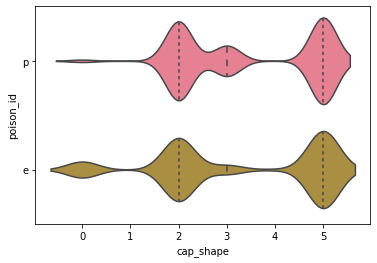

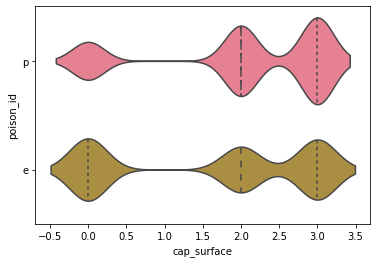

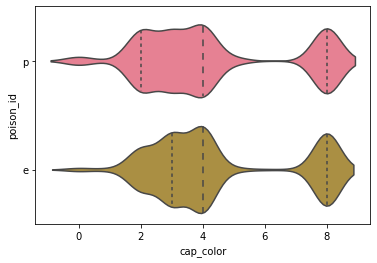

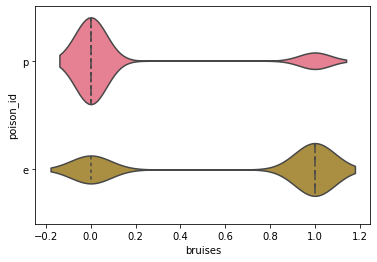

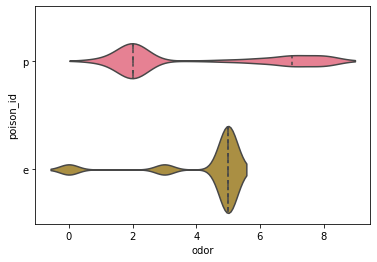

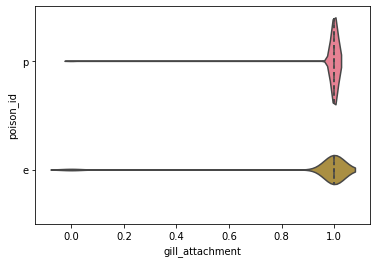

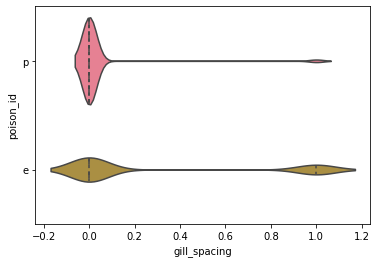

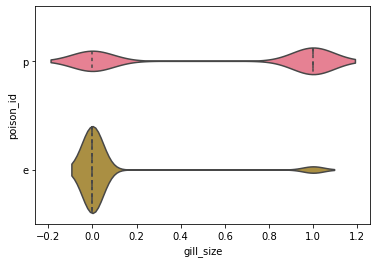

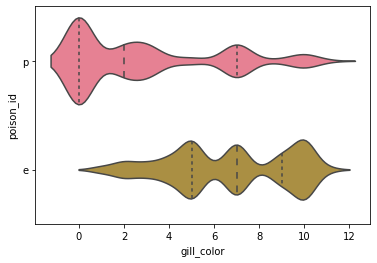

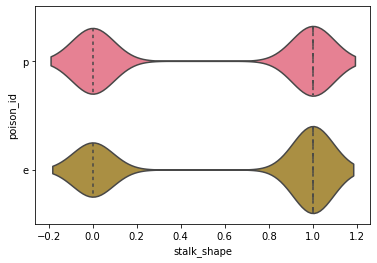

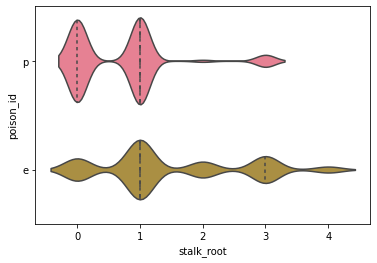

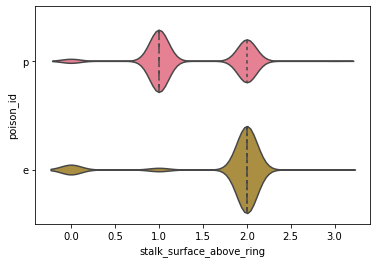

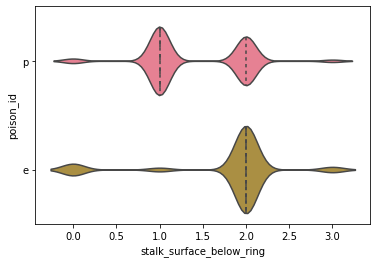

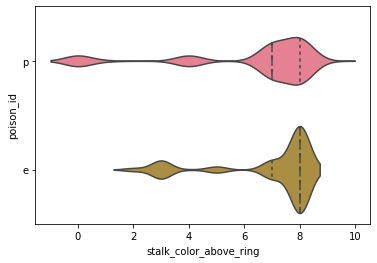

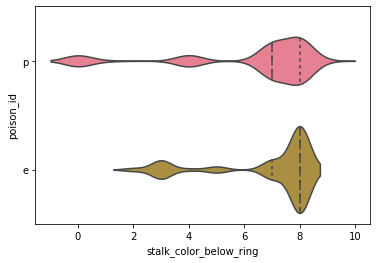

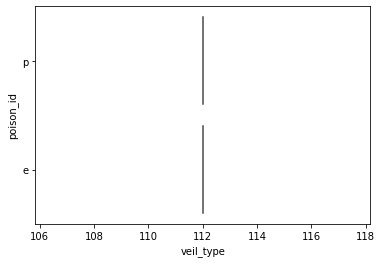

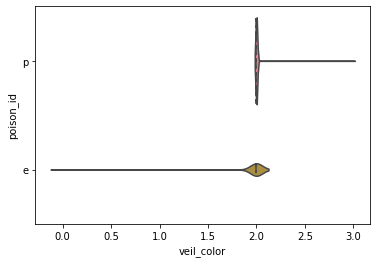

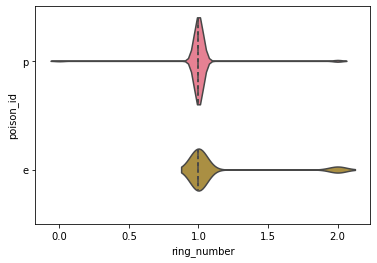

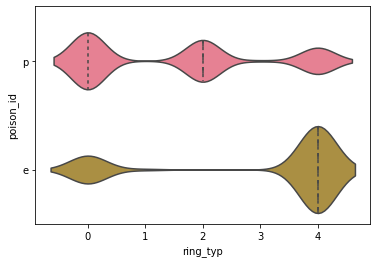

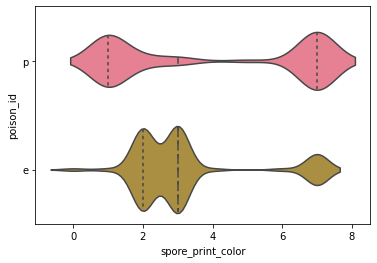

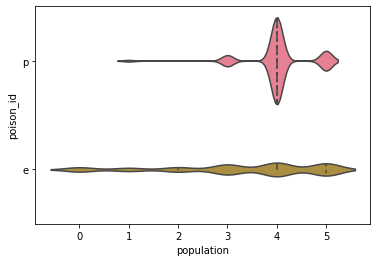

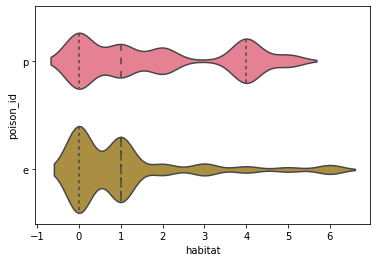

In [9]:
"""---  ------                    --------------  -----  
 0   poison_id                 8124 non-null   float64
 1   cap_shape                 8124 non-null   float64
 2   cap_surface               8124 non-null   float64
 3   cap_color                 8124 non-null   float64
 4   bruises                   8124 non-null   float64
 5   odor                      8124 non-null   float64
 6   gill_attachment           8124 non-null   float64
 7   gill_spacing              8124 non-null   float64
 8   gill_size                 8124 non-null   float64
 9   gill_color                8124 non-null   float64
 10  stalk_shape               8124 non-null   float64
 11  stalk_root                8124 non-null   float64
 12  stalk_surface_above_ring  8124 non-null   float64
 13  stalk_surface_below_ring  8124 non-null   float64
 14  stalk_color_above_ring    8124 non-null   float64
 15  stalk_color_below_ring    8124 non-null   float64
 16  veil_type                 8124 non-null   float64
 17  veil_color                8124 non-null   float64
 18  ring_number               8124 non-null   float64
 19  ring_typ                  8124 non-null   float64
 20  spore_print_color         8124 non-null   float64
 21  population                8124 non-null   float64
 22  habitat                   8124 non-null   float64
 23  mushroom_id               8124 non-null   int64  
 """
g = sns.violinplot(y='poison_id', x='cap_shape', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='cap_surface', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='cap_color', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='bruises', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='odor', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='gill_attachment', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='gill_spacing', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='gill_size', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='gill_color', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='stalk_shape', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='stalk_root', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='stalk_surface_above_ring', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='stalk_surface_below_ring', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='stalk_color_above_ring', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='stalk_color_below_ring', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='veil_type', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='veil_color', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='ring_number', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='ring_typ', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='spore_print_color', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='population', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='poison_id', x='habitat', data=data, inner='quartile')
plt.show()


In [77]:
X = data.drop(['mushroom_id', 'poison_id'], axis=1)
y = data['poison_id']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)


(8124, 22)
(8124,)


In [79]:
from sklearn import preprocessing

X

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_typ,spore_print_color,population,habitat
0,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,3.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,4.0,2.0,3.0,5.0
1,5.0,2.0,8.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,2.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,4.0,3.0,2.0,1.0
2,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,4.0,3.0,2.0,3.0
3,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,3.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,4.0,2.0,3.0,5.0
4,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,3.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,0.0,3.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,0.0,2.0,2.0,5.0,5.0,112.0,1.0,1.0,4.0,0.0,1.0,2.0
8120,5.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,11.0,0.0,0.0,2.0,2.0,5.0,5.0,112.0,0.0,1.0,4.0,0.0,4.0,2.0
8121,2.0,2.0,4.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,2.0,5.0,5.0,112.0,1.0,1.0,4.0,0.0,1.0,2.0
8122,3.0,3.0,4.0,0.0,8.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,1.0,8.0,8.0,112.0,2.0,1.0,0.0,7.0,4.0,2.0


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
scaler = preprocessing.StandardScaler().fit(X_train)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(6499, 22)
(6499,)
(1625, 22)
(1625,)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


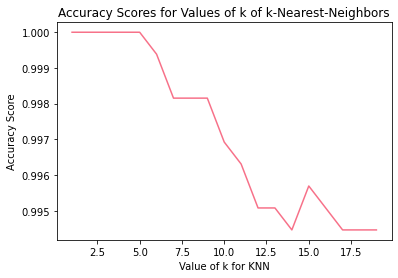

In [89]:
# experimenting with different n values
k_range = list(range(1, 20))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print(k)
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [90]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


print(metrics.accuracy_score(y_test, y_pred))

0.9433846153846154


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [54]:
data.head(5)

,poison_id,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,stalk_root,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_typ,spore_print_color,population,habitat,mushroom_id
0,p,5.0,2.0,4.0,1.0,6.0,1.0,0.0,1.0,4.0,0.0,3.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,4.0,2.0,3.0,5.0,1
1,e,5.0,2.0,8.0,1.0,0.0,1.0,0.0,0.0,4.0,0.0,2.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,4.0,3.0,2.0,1.0,2
2,e,0.0,2.0,8.0,1.0,3.0,1.0,0.0,0.0,5.0,0.0,2.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,4.0,3.0,2.0,3.0,3
3,p,5.0,3.0,8.0,1.0,6.0,1.0,0.0,1.0,5.0,0.0,3.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,4.0,2.0,3.0,5.0,4
4,e,5.0,2.0,3.0,0.0,5.0,1.0,1.0,0.0,4.0,1.0,3.0,2.0,2.0,8.0,8.0,112.0,2.0,1.0,0.0,3.0,0.0,1.0,5


In [55]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X.values, y)

# make a prediction for an example of an out-of-sample observation
#56.0	51.0	46.0	52.0	48.0	38.0	35.0	46.0	43.0	37.0	37.0	51.0	51.0	55.0	55.0	48.0	55.0	47.0	48.0	43.0	51.0	53.0	1
#56.0	51.0	46.0	52.0	48.0	38.0	35.0	46.0	43.0	37.0	37.0	51.0	51.0	55.0	55.0	48.0	55.0	47.0	48.0	43.0	51.0	53.0	1
knn.predict([[5,2,3,0,5,1,1,0,4,1,3,2,2,8,8,112,2,1,0,3,0,1]])


array(['e'], dtype=object)

In [56]:
# predict with 1250 iteration and .2 test set
knn.predict([[5.0,	3.0,	8.0,	1.0,	6.0,	1.0,	0.0,	1.0,	5.0,	0.0,	3.0,	2.0,	2.0,	8.0,	8.0,	112.0,	2.0,	1.0,	4.0,	2.0,	3.0,	5.0	]])

array(['p'], dtype=object)

In [57]:
# predict with 1250 iteration and .2 test set
knn.predict([[3.0,	2.0,	6.0,	0.0,	5.0,	0.0,	1.0,	1.0,	4.0,	1.0,	2.0,	2.0,	2.0,	8.0,	8.0,	1122.0,	2.0,	1.0,	3.0,	2.0,	3.0,	4.0	]])

array(['p'], dtype=object)

In [58]:
# predict with 1250 iteration and .2 test set
knn.predict([[3.0,	2.0,	6.0,	0.0,	5.0,	0.0,	1.0,	1.0,	4.0,	1.0,	2.0,	2.0,	2.0,	8.0,	8.0,	1122.0,	2.0,	1.0,	3.0,	2.0,	3.0,	4.0	]])

array(['p'], dtype=object)

In [52]:
https://grapheneos.org/
https://ubuntu.com/
https://blackberry.qnx.com/content/dam/qnx/static-linuxlanding/static/QNX-Medical-White-Paper-f7124c5376aac812a5822f2523946dcb.pdf
https://os.mbed.com/mbed-os/
https://manjaro.org/
https://www.lynx.com/products/lynxos-posix-real-time-operating-system-rtos
https://sourceforge.net/software/product/BlackBerry-QNX/alternatives


SyntaxError: ignored

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)
scaler = preprocessing.StandardScaler().fit(X_train)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(scaler.mean_)
print(scaler.scale_)

(6499, 22)
(6499,)
(1625, 22)
(1625,)
[  3.34605324   1.82581936   4.36159409   0.41529466   4.16187106
   0.97430374   0.16356363   0.31374058   4.78996769   0.56931836
   1.10216956   1.57747346   1.60517003   6.61163256   6.59947684
 112.           1.96491768   1.07216495   2.28619788   3.61917218
   3.63979074   1.51284813]
[1.6009271  1.22940504 2.3240434  0.49277277 2.10662506 0.15822757
 0.36987912 0.46401231 3.54645833 0.49517165 1.06100715 0.62093325
 0.67337494 2.27206862 2.26184248 1.         0.24622124 0.27209407
 1.80720515 2.37629634 1.25252477 1.71924102]


In [93]:
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)
X_train_minmax

array([[0.4       , 1.        , 1.        , ..., 0.14285714, 0.8       ,
        0.        ],
       [0.6       , 0.66666667, 0.5       , ..., 0.57142857, 0.2       ,
        0.33333333],
       [1.        , 1.        , 0.25      , ..., 0.42857143, 0.8       ,
        0.        ],
       ...,
       [0.4       , 0.        , 1.        , ..., 0.14285714, 0.8       ,
        0.16666667],
       [1.        , 1.        , 0.5       , ..., 0.28571429, 0.8       ,
        0.        ],
       [1.        , 1.        , 0.375     , ..., 0.42857143, 0.8       ,
        0.        ]])

In [94]:
X_test_minmax = min_max_scaler.transform(X_test)

In [95]:
X_test_minmax

array([[1.        , 0.66666667, 0.        , ..., 0.14285714, 0.6       ,
        0.16666667],
       [0.6       , 1.        , 0.5       , ..., 1.        , 0.8       ,
        0.        ],
       [0.4       , 1.        , 1.        , ..., 0.14285714, 0.8       ,
        0.16666667],
       ...,
       [1.        , 0.        , 1.        , ..., 0.14285714, 0.8       ,
        0.66666667],
       [0.4       , 1.        , 1.        , ..., 0.14285714, 0.8       ,
        0.66666667],
       [0.4       , 1.        , 0.375     , ..., 0.14285714, 1.        ,
        0.        ]])

In [96]:
min_max_scaler.scale_

array([0.2       , 0.33333333, 0.125     , 1.        , 0.125     ,
       1.        , 1.        , 1.        , 0.09090909, 1.        ,
       0.25      , 0.33333333, 0.33333333, 0.11111111, 0.11111111,
       1.        , 0.33333333, 0.5       , 0.25      , 0.14285714,
       0.2       , 0.16666667])

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


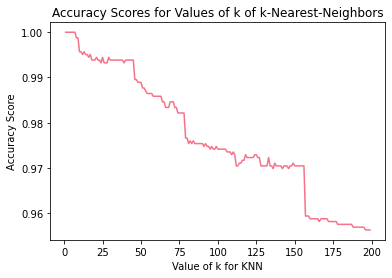

In [101]:
# experimenting with different n values
k_range = list(range(1, 200))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_minmax, y_train)
    y_pred = knn.predict(X_test_minmax)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    print(k)
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()